<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   10000 non-null  object
 1   text    10000 non-null  object
 2   lebel   10000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 234.5+ KB
      title   text  lebel
0     False  False  False
1     False  False  False
2     False  False  False
3     False  False  False
4     False  False  False
...     ...    ...    ...
9995  False  False  False
9996  False  False  False
9997  False  False  False
9998  False  False  False
9999  False  False  False

[10000 rows x 3 columns]
Training Logistic Regression...
Logistic Regression Accuracy: 0.9810
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       995
           1       0.98      0.99      0.98      1005

    accuracy                           0.98      2000
   macro avg       0.98      0.98   

C:\Users\pc\AppData\Local\Temp\ipykernel_11232\311802234.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='viridis')


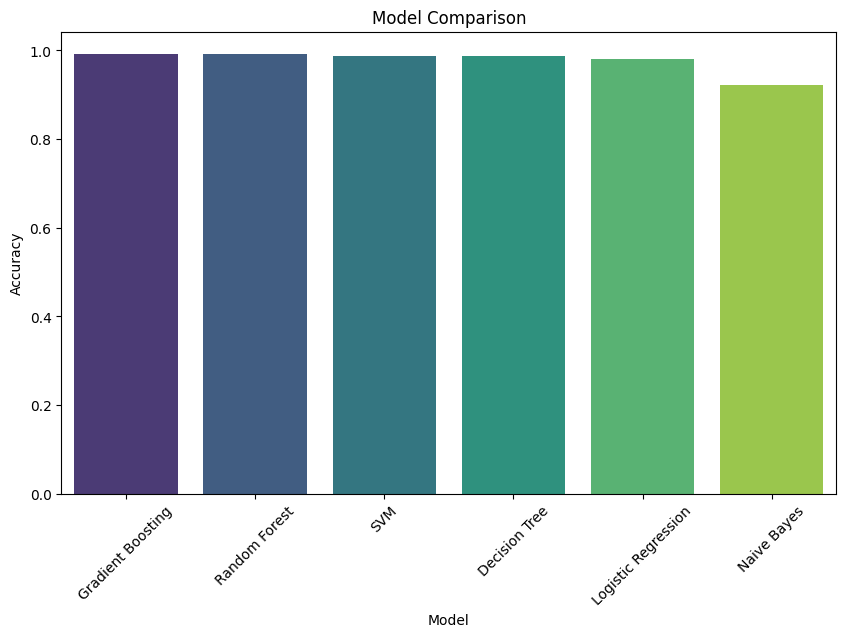

In [1]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('final_en.csv')
data.describe()
data.info()
data.describe()
result = data.isna()
print(result)
data.dropna(axis=1, inplace=True)
#Text Preproccessing 
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

data['cleaned_text'] = data['text'].apply(clean_text)
tfidf = TfidfVectorizer(max_features=5000, stop_words='english') # remove "the", "is", "in", "and", "of", "on", "a", "to", "with", etc.
X = tfidf.fit_transform(data['cleaned_text']).toarray()
y = data['lebel']
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Train Multiple Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(kernel='linear', probability=True)
}

results = {}
model_predictions = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_predictions[name] = y_pred
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
 #Compare Results
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='viridis')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

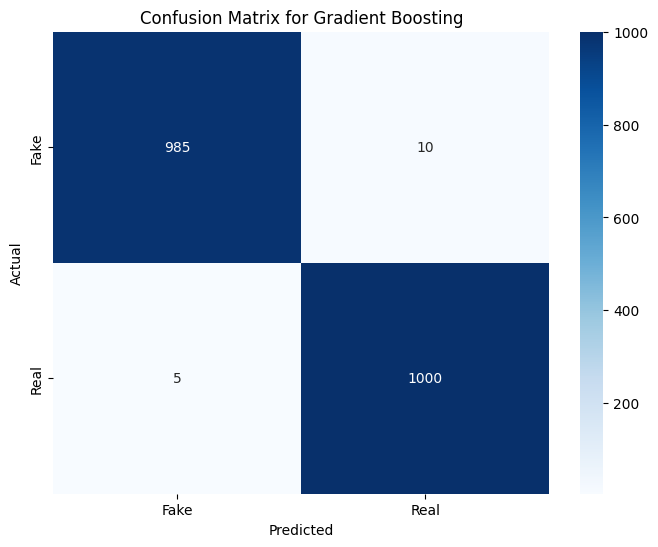

In [2]:
# Confusion Matrix Visualization for Best Model
best_model_name = results_df.index[0]
best_model_predictions = model_predictions[best_model_name]
conf_matrix = confusion_matrix(y_test, best_model_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


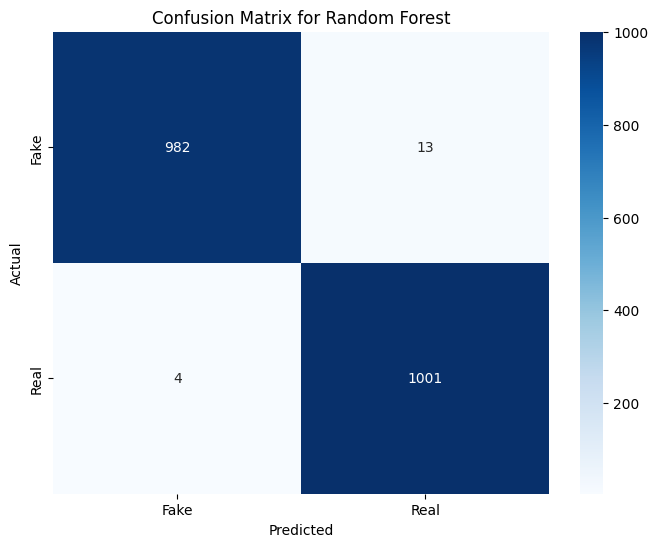

In [3]:
# Confusion Matrix Visualization for Best Model
best_model_name = results_df.index[1]
best_model_predictions = model_predictions[best_model_name]
conf_matrix = confusion_matrix(y_test, best_model_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


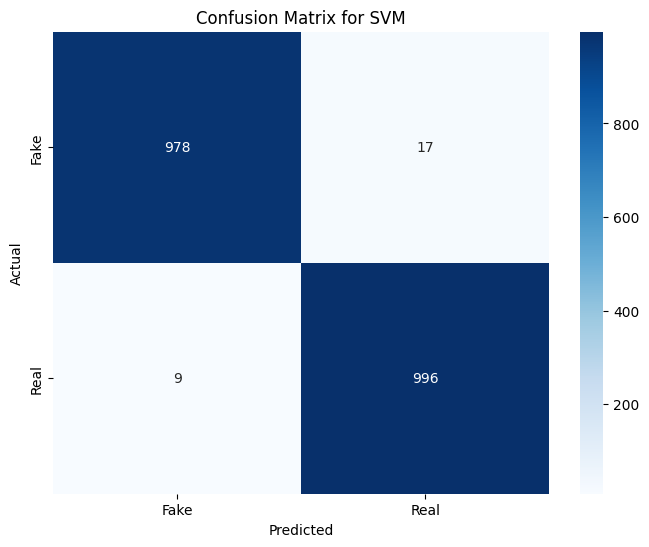

In [4]:
# Confusion Matrix Visualization for Best Model
best_model_name = results_df.index[2]
best_model_predictions = model_predictions[best_model_name]
conf_matrix = confusion_matrix(y_test, best_model_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


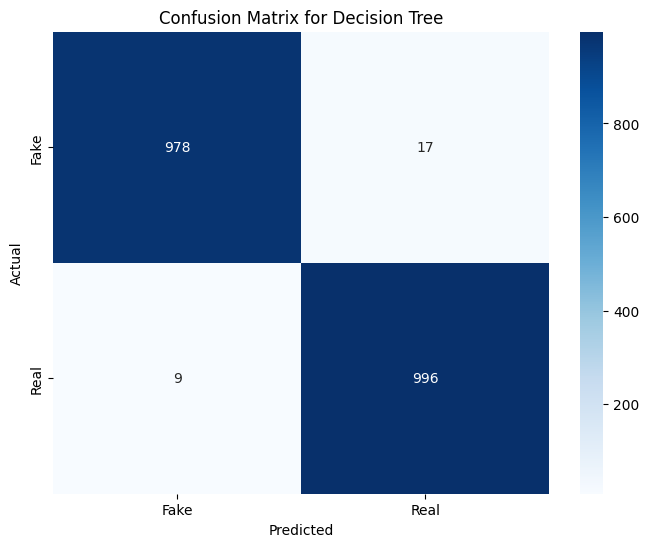

In [5]:
# Confusion Matrix Visualization for Best Model
best_model_name = results_df.index[3]
best_model_predictions = model_predictions[best_model_name]
conf_matrix = confusion_matrix(y_test, best_model_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


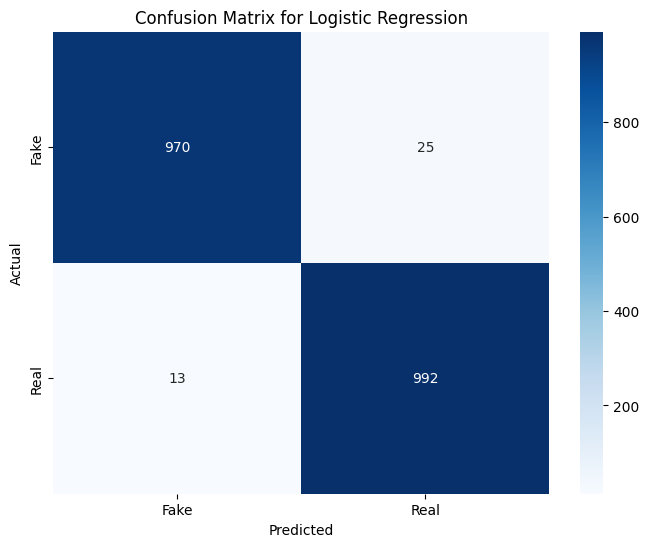

In [6]:
# Confusion Matrix Visualization for Best Model
best_model_name = results_df.index[4]
best_model_predictions = model_predictions[best_model_name]
conf_matrix = confusion_matrix(y_test, best_model_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


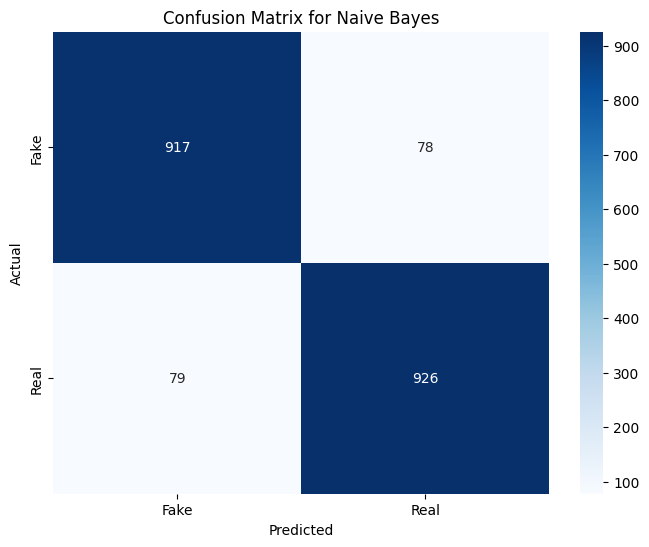

In [7]:
# Confusion Matrix Visualization for Best Model
best_model_name = results_df.index[5]
best_model_predictions = model_predictions[best_model_name]
conf_matrix = confusion_matrix(y_test, best_model_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
